# Airline Passenger Satisfaction Analysis

# Objective
The objective of this project is to identify and rank the most critical factors influencing airline passenger satisfaction, with a focus on service attributes and flight related issues, to provide targetted recommendations for improving the overall passenger experience.This will help the airlines to allocate resources more effectively to areas that have the greatest impact on satisfaction.

# Introduction

In today's highly competitive airline industry, passenger satisfaction plays a pivotal role in determining an airline's success and customer loyality.
This project focuses on analysing the various factors that contribute to airline passenger satisfaction.

The dataset used in this project includes 129880 rows and 24 columns with various features related to passengers and their flight experience. These features include demograpic information(Age,Gender,Class), Flight Details(Flight distance,flight delay) , service ratings(on cleanliness and inflight services) and overall satisfaction

**STEPS**


**1. Import libraries and load dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
dataset=pd.read_csv("airline_passenger_satisfaction1.csv")

**2. Understand Data Structure**

show top 5 records

In [ ]:
dataset.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


Show bottom 5 records

In [ ]:
dataset.tail()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
129875,129876,Male,28,Returning,Personal,Economy Plus,447,2,3.0,4,...,5,1,4,4,4,5,4,4,4,Neutral or Dissatisfied
129876,129877,Male,41,Returning,Personal,Economy Plus,308,0,0.0,5,...,5,2,5,2,2,4,3,2,5,Neutral or Dissatisfied
129877,129878,Male,42,Returning,Personal,Economy Plus,337,6,14.0,5,...,3,3,4,3,3,4,2,3,5,Neutral or Dissatisfied
129878,129879,Male,50,Returning,Personal,Economy Plus,337,31,22.0,4,...,4,4,5,3,3,4,5,3,5,Satisfied
129879,129880,Female,20,Returning,Personal,Economy Plus,337,0,0.0,1,...,4,2,4,2,2,2,3,2,1,Neutral or Dissatisfied


Check null and data type

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

Check the statistics of the dataset

In [ ]:
dataset.describe()

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,64940.500000,39.427957,1190.316392,14.713713,15.091129,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114
std,37493.270818,15.119360,997.452477,38.071126,38.465650,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,32470.750000,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,64940.500000,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,97410.250000,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,129880.000000,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
dataset.describe(include='O')

,Gender,Customer Type,Type of Travel,Class,Satisfaction
count,129880,129880,129880,129880,129880
unique,2,2,2,3,2
top,Female,Returning,Business,Business,Neutral or Dissatisfied
freq,65899,106100,89693,62160,73452


Shape of the dataset

In [ ]:
dataset.shape

(129880, 24)

Indicates there are 129880 rows and 24 columns in the dataset

Check the number of unique values of each column

In [ ]:
dataset.nunique()


,0
ID,129880
Gender,2
Age,75
Customer Type,2
Type of Travel,2
Class,3
Flight Distance,3821
Departure Delay,466
Arrival Delay,472
Departure and Arrival Time Convenience,6


**3.Handle missing data**

In [ ]:
dataset.isna().sum()

,0
ID,0
Gender,0
Age,0
Customer Type,0
Type of Travel,0
Class,0
Flight Distance,0
Departure Delay,0
Arrival Delay,393
Departure and Arrival Time Convenience,0


From the above result, it is clear that only one feature is having missing values(Arrival Dealy- 393 missing values in the column)

**Missing value imputation** - From the statistics of Arrival delay, minimum is 0 mints and maximum is 1584 mints. Since there are extreme values in the Arrival Delay feature, median imputation will be the best suited method to handle missing values, than mean imputation

In [3]:
dataset['Arrival Delay'] = dataset['Arrival Delay'].fillna(dataset['Arrival Delay'].median())

In [ ]:
dataset.isna().sum()

,0
ID,0
Gender,0
Age,0
Customer Type,0
Type of Travel,0
Class,0
Flight Distance,0
Departure Delay,0
Arrival Delay,0
Departure and Arrival Time Convenience,0


**4.Handle duplicates**

In [ ]:
dataset.duplicated().sum()

0

There are no duplicate values in the dataset

**5. Handling outliers**

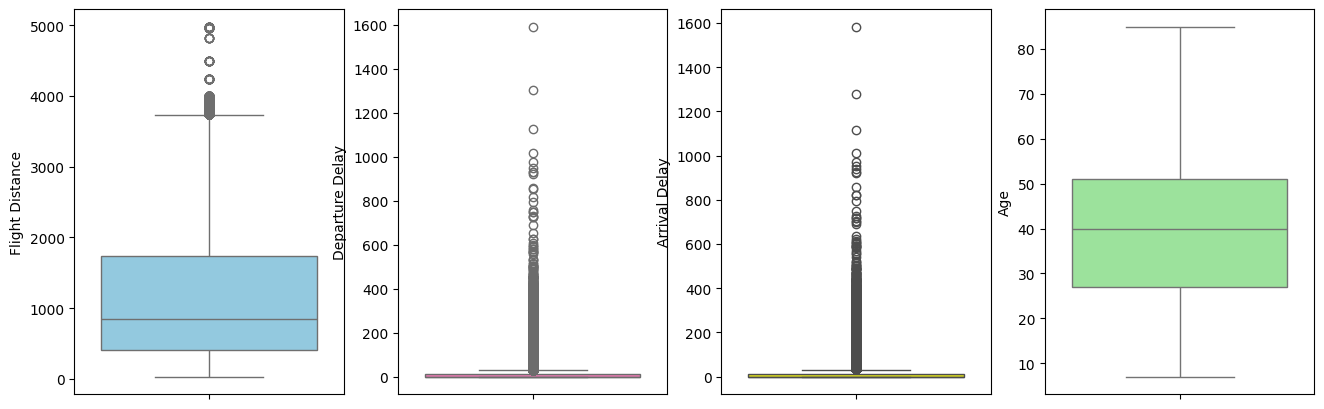

In [4]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(dataset['Flight Distance'],color='skyblue')
plt.subplot(142)
sns.boxplot(dataset['Departure Delay'],color='hotpink')
plt.subplot(143)
sns.boxplot(dataset['Arrival Delay'],color='yellow')
plt.subplot(144)
sns.boxplot(dataset['Age'],color='lightgreen')
plt.show()

From visualization, it is clear that features flight distance departure delay, arrival delay are having  outliers.
Handle the outliers using IQR method.

In [5]:
def detect_outlier_iqr(data):
  Q1=data.quantile(0.25)
  Q3=data.quantile(0.75)
  IQR=Q3-Q1

  lower_bound=Q1-1.5*IQR
  upper_bound=Q3+1.5*IQR
  return lower_bound,upper_bound
numeric_colms=['Flight Distance','Departure Delay','Arrival Delay']
for col in numeric_colms:
  lower_bound,upper_bound=detect_outlier_iqr(dataset[col])
  dataset[col]=np.where(dataset[col]<lower_bound,lower_bound,dataset[col])
  dataset[col]=np.where(dataset[col]>upper_bound,upper_bound,dataset[col])

Instead of removing the outliers, it is transformed to the lower and upper bound values.

Visualization after outlier removal

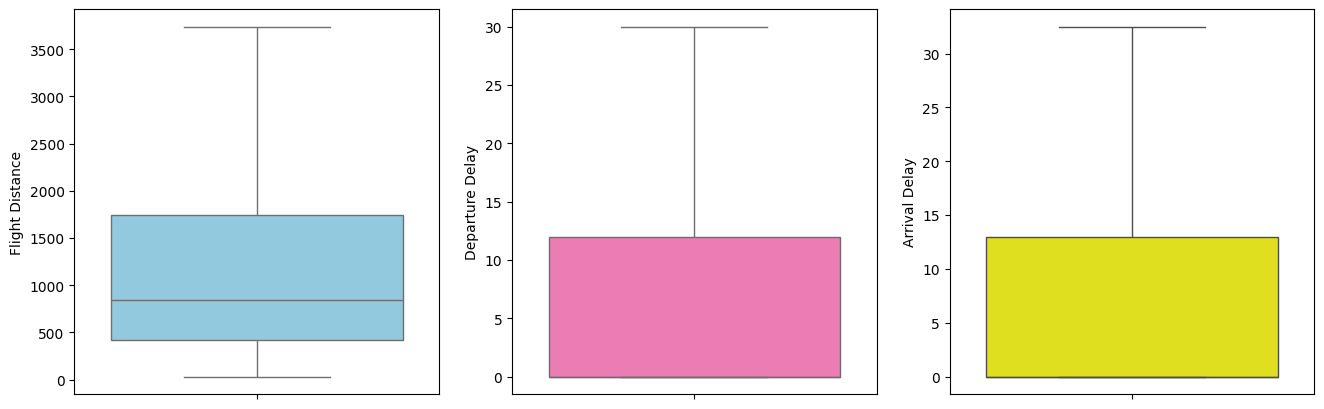

In [6]:
plt.subplots(1,3,figsize=(16,5))
plt.subplot(131)
sns.boxplot(dataset['Flight Distance'],color='skyblue')
plt.subplot(132)
sns.boxplot(dataset['Departure Delay'],color='hotpink')
plt.subplot(133)
sns.boxplot(dataset['Arrival Delay'],color='yellow')
plt.show()

Identify the numeric features and categorical features

In [ ]:
numerical_variables_new = dataset.select_dtypes(include =[np.number])
numerical_variables_new.drop('ID', axis =1,inplace = True)
numerical_variables_new.head()

,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
0,48,821.0,2.0,5.0,3,3,4,3,3,3,5,2,5,5,5,3,5,5
1,35,821.0,26.0,32.5,2,2,3,5,2,5,4,5,5,3,5,2,5,5
2,41,853.0,0.0,0.0,4,4,4,5,4,3,5,3,5,5,3,4,3,3
3,50,1905.0,0.0,0.0,2,2,3,4,2,5,5,5,4,4,5,2,5,5
4,49,3470.0,0.0,1.0,3,3,3,5,3,3,4,4,5,4,3,3,3,3


Visualization of numerical features

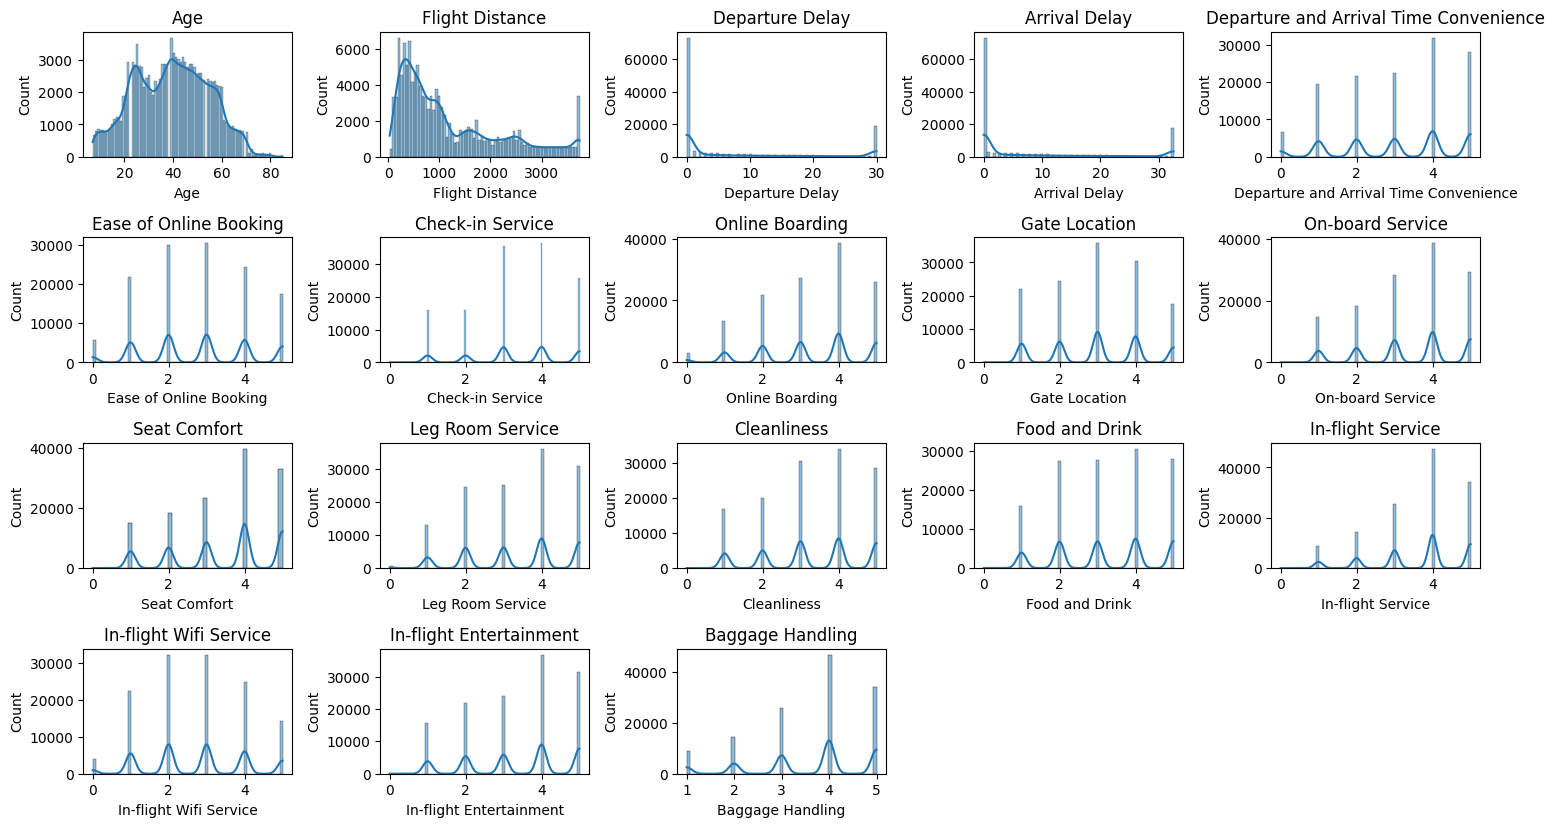

In [ ]:
# Set the figure size
plt.figure(figsize=(15, 10))

# Loop through each numerical variable to create histograms
for i, column in enumerate(numerical_variables_new.columns, 1):
    plt.subplot(5, 5, i)  # Create a subplot for each numerical variable
    sns.histplot(numerical_variables_new[column], kde=True)
    plt.title(column)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

Visualiation of categorical features

In [ ]:
categorical_features_new =  dataset.select_dtypes(include ='object')
categorical_features_new.columns

Index(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Satisfaction'], dtype='object')

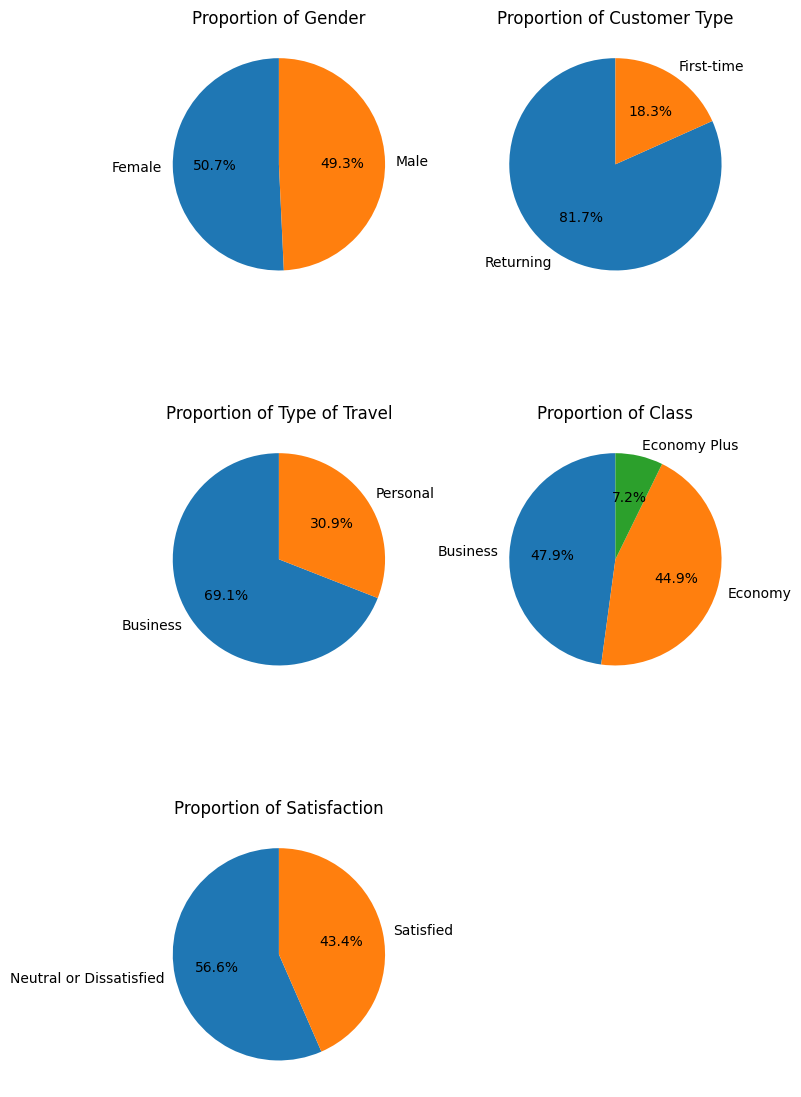

In [ ]:
def plot_pie_charts_two_columns(df):
    num_features = len(df.columns)
    num_cols = 2
    num_rows = (num_features + num_cols - 1) // num_cols  # Calculate number of rows needed

    plt.figure(figsize=(8, num_rows * 4))

    for i, column in enumerate(df.columns):
        plt.subplot(num_rows, num_cols, i + 1)
        counts = df[column].value_counts()
        plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
        plt.title(f'Proportion of {column}')

    plt.tight_layout()
    plt.show()


plot_pie_charts_two_columns(categorical_features_new)

**6.Data Transformation**

Applying label encoding for features with 2 unique values

In [7]:
le=LabelEncoder()
dataset['Gender']=le.fit_transform(dataset['Gender'])
dataset['Customer Type']=le.fit_transform(dataset['Customer Type'])
dataset['Type of Travel']=le.fit_transform(dataset['Type of Travel'])

dataset['Satisfaction']=le.fit_transform(dataset['Satisfaction'])

dataset.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,1,48,0,0,Business,821.0,2.0,5.0,3,...,3,5,2,5,5,5,3,5,5,0
1,2,0,35,1,0,Business,821.0,26.0,32.5,2,...,5,4,5,5,3,5,2,5,5,1
2,3,1,41,1,0,Business,853.0,0.0,0.0,4,...,3,5,3,5,5,3,4,3,3,1
3,4,1,50,1,0,Business,1905.0,0.0,0.0,2,...,5,5,5,4,4,5,2,5,5,1
4,5,0,49,1,0,Business,3470.0,0.0,1.0,3,...,3,4,4,5,4,3,3,3,3,1


Applying one-hot encoding for features with more than two unique values



In [8]:
dataset=pd.get_dummies(dataset,columns=['Class'],drop_first=False)

In [ ]:
dataset.head()

,ID,Gender,Age,Customer Type,Type of Travel,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Class_Business,Class_Economy,Class_Economy Plus
0,1,1,48,0,0,821.0,2.0,5.0,3,3,...,5,5,5,3,5,5,0,True,False,False
1,2,0,35,1,0,821.0,26.0,32.5,2,2,...,5,3,5,2,5,5,1,True,False,False
2,3,1,41,1,0,853.0,0.0,0.0,4,4,...,5,5,3,4,3,3,1,True,False,False
3,4,1,50,1,0,1905.0,0.0,0.0,2,2,...,4,4,5,2,5,5,1,True,False,False
4,5,0,49,1,0,3470.0,0.0,1.0,3,3,...,5,4,3,3,3,3,1,True,False,False


All the categorical features are now encoded.

**7. Standardization**

Appling standard scaler for features having a normal distribution(Age and Flight distance) and Robust scaling for features having extreme values(Arrival/Departuredelay),Since robust scaling reduces the influence of outliers. All other numerical features are ratings, which are on similar scales, no need of standardization.

In [9]:
#Initialize scalers
standard_scaler=StandardScaler()
robust_scaler=RobustScaler()

#Apply standardization methods to different features
dataset[['Age','Flight Distance']]= standard_scaler.fit_transform(dataset[['Age','Flight Distance']])
dataset[['Departure Delay','Arrival Delay']]=robust_scaler.fit_transform(dataset[['Departure Delay','Arrival Delay']])




In [ ]:
dataset.head()

,ID,Gender,Age,Customer Type,Type of Travel,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Class_Business,Class_Economy,Class_Economy Plus
0,1,1,0.566960,0,0,-0.370294,0.166667,0.384615,3,3,...,5,5,5,3,5,5,0,True,False,False
1,2,0,-0.292868,1,0,-0.370294,2.166667,2.500000,2,2,...,5,3,5,2,5,5,1,True,False,False
2,3,1,0.103976,1,0,-0.337919,0.000000,0.000000,4,4,...,5,5,3,4,3,3,1,True,False,False
3,4,1,0.699242,1,0,0.726438,0.000000,0.000000,2,2,...,4,4,5,2,5,5,1,True,False,False
4,5,0,0.633101,1,0,2.309819,0.000000,0.076923,3,3,...,5,4,3,3,3,3,1,True,False,False


Hence all the numerical features are now scaled down.

**8. Feature selection using correlation matrix technique**

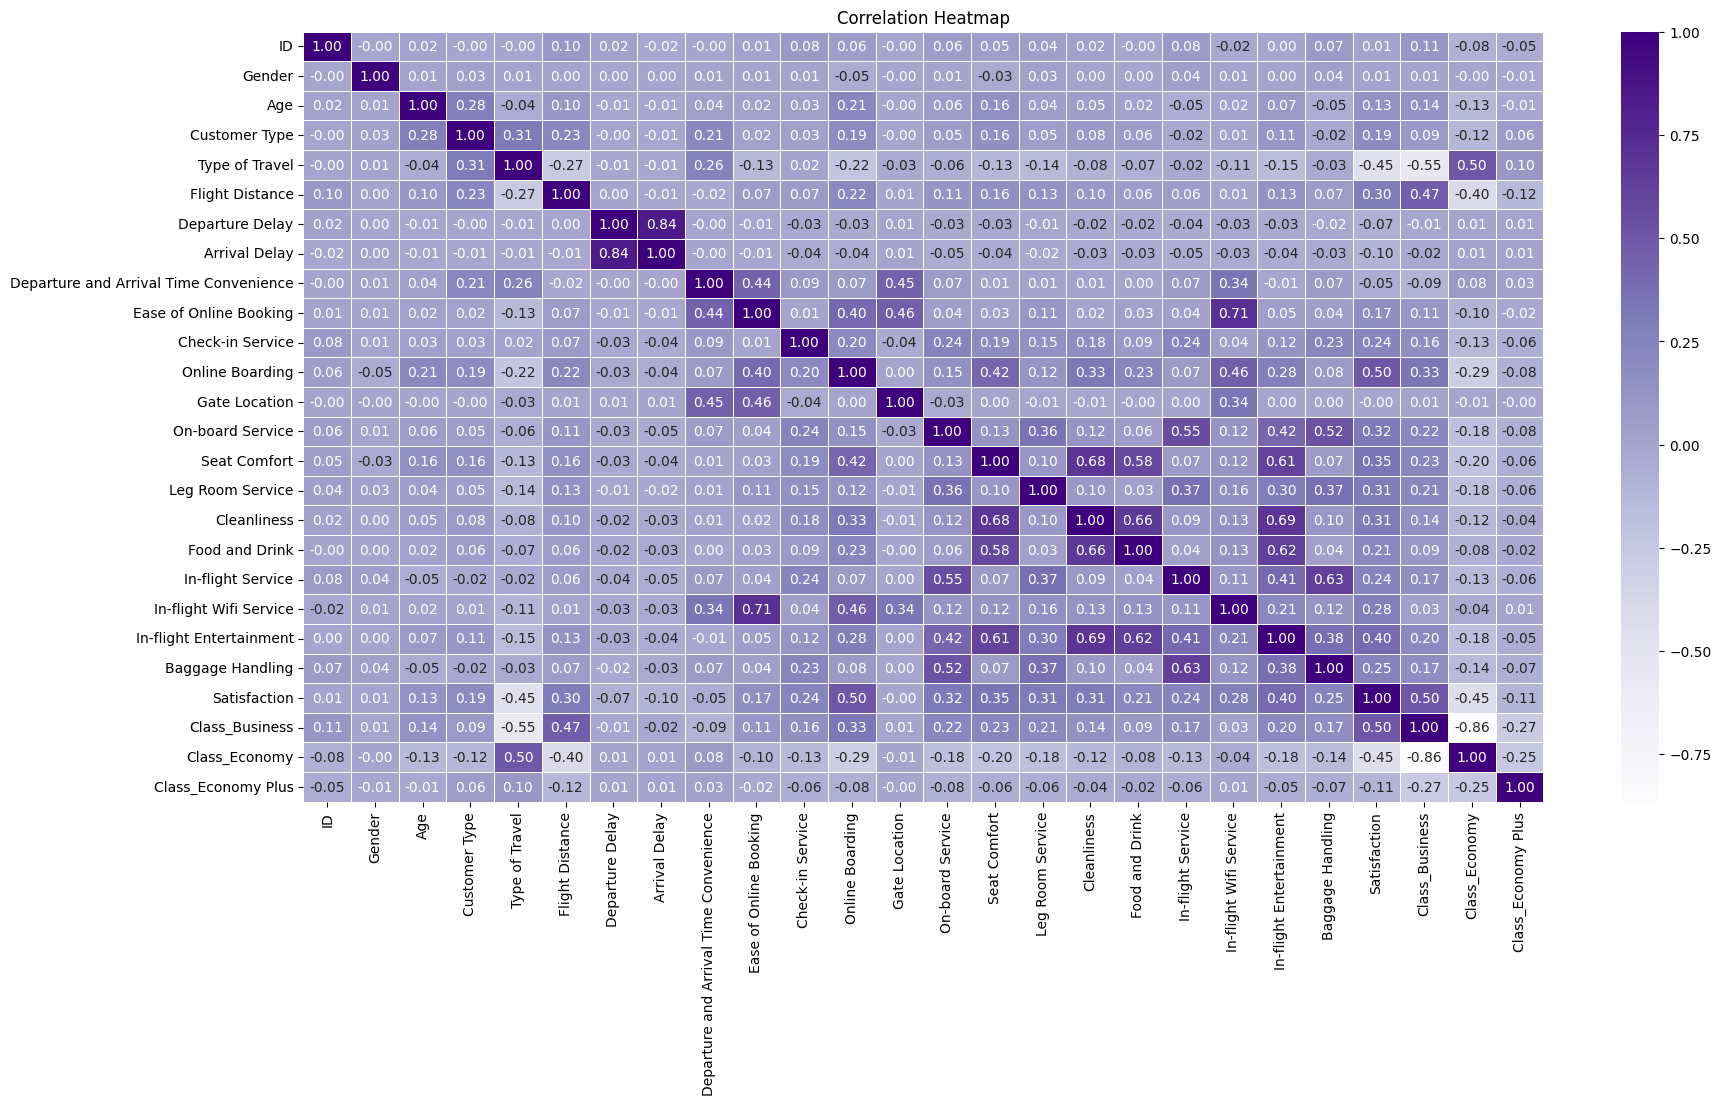

In [10]:
# Calculate the correlation matrix
correlation_matrix = dataset.corr()

# Set up the matplotlib figure
plt.figure(figsize=(20, 10))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="Purples", fmt= '.2f', linewidths=0.6)


# Add title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

Select features having correlation greater than 0.2 and removing features having multi collinearity with each other greater than 0.8. Even though some features are having correlation less than threshold, they still influence the target variable. Hence mainatining those features as well in the selected feaures.

In [11]:
# Define thresholds for feature selection
target_threshold=0.2
multicollinearity_threshold=0.8

#specify important features that should not be removed
important_features=['Age','Gender','Customer Type','Arrival Delay','Class_Economy Plus']

#Get correlation with the target variable
target_variable='Satisfaction'
target_correlation=correlation_matrix[target_variable].abs()

#select features based on correlation and add important features as well.
selected_features=target_correlation[target_correlation>target_threshold].index.tolist()
selected_features.extend([feature for feature in important_features if feature not in selected_features])

#Remove target column
selected_features.remove(target_variable)

#check multicollinearirity and drop highly correlated features
filtered_features=selected_features.copy()

for feature in selected_features:
  for other_feature in filtered_features:
    if feature!=other_feature and correlation_matrix[feature][other_feature]>multicollinearity_threshold:
      if feature not in important_features:
        filtered_features.remove(feature)
        break


print('selected_features:',filtered_features)




selected_features: ['Type of Travel', 'Flight Distance', 'Check-in Service', 'Online Boarding', 'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness', 'Food and Drink', 'In-flight Service', 'In-flight Wifi Service', 'In-flight Entertainment', 'Baggage Handling', 'Class_Business', 'Class_Economy', 'Age', 'Gender', 'Customer Type', 'Arrival Delay', 'Class_Economy Plus']


## Relevant features for model training and evaluation

'Type of Travel', 'Flight Distance', 'Check-in Service', 'Online Boarding', 'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness', 'Food and Drink', 'In-flight Service', 'In-flight Wifi Service', 'In-flight Entertainment', 'Baggage Handling', 'Class_Business', 'Class_Economy', 'Age', 'Gender', 'Customer Type', 'Arrival Delay', 'Class_Economy Plus'

# Model training and evaluation

## Logistic Regression

In [12]:
# Prepare data
feature_columns_1 = features =['Type of Travel', 'Flight Distance', 'Check-in Service', 'Online Boarding', 'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness', 'Food and Drink', 'In-flight Service', 'In-flight Wifi Service', 'In-flight Entertainment', 'Baggage Handling', 'Class_Business', 'Class_Economy','Class_Economy Plus']
target_column = 'Satisfaction'

X = dataset[feature_columns_1]
y = dataset[target_column]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Logistic Regression model
model1 = LogisticRegression(max_iter=1000)

# Train the model
model1.fit(X_train, y_train)

# Make predictions
y_pred = model1.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8589852171234986
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88     14723
           1       0.85      0.82      0.84     11253

    accuracy                           0.86     25976
   macro avg       0.86      0.85      0.86     25976
weighted avg       0.86      0.86      0.86     25976

Confusion Matrix:
[[13043  1680]
 [ 1983  9270]]


In [13]:

# Prepare data
feature_columns_2 = features =['Type of Travel', 'Flight Distance', 'Check-in Service', 'Online Boarding', 'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness', 'Food and Drink', 'In-flight Service', 'In-flight Wifi Service', 'In-flight Entertainment', 'Baggage Handling', 'Class_Business', 'Class_Economy', 'Age', 'Gender', 'Customer Type', 'Arrival Delay', 'Class_Economy Plus']

target_column = 'Satisfaction'
X = dataset[feature_columns_2]
y = dataset[target_column]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Logistic Regression model
model2= LogisticRegression(max_iter=1000)

# Train the model
model2.fit(X_train, y_train)

# Make predictions
y_pred = model2.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8734216199568833
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89     14723
           1       0.87      0.84      0.85     11253

    accuracy                           0.87     25976
   macro avg       0.87      0.87      0.87     25976
weighted avg       0.87      0.87      0.87     25976

Confusion Matrix:
[[13259  1464]
 [ 1824  9429]]


In [14]:
# Prepare data
feature_columns_3 = features =['Type of Travel', 'Flight Distance', 'Check-in Service', 'Online Boarding', 'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness', 'Food and Drink', 'In-flight Service', 'In-flight Wifi Service', 'In-flight Entertainment', 'Baggage Handling', 'Class_Business', 'Class_Economy', 'Age', 'Gender', 'Customer Type', 'Arrival Delay', 'Class_Economy Plus','Departure and Arrival Time Convenience']

target_column = 'Satisfaction'
X = dataset[feature_columns_3]
y = dataset[target_column]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Logistic Regression model
model3 = LogisticRegression(max_iter=1000)

# Train the model
model3.fit(X_train, y_train)

# Make predictions
y_pred = model3.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.8751154912226671
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89     14723
           1       0.87      0.84      0.85     11253

    accuracy                           0.88     25976
   macro avg       0.87      0.87      0.87     25976
weighted avg       0.87      0.88      0.87     25976

Confusion Matrix:
[[13281  1442]
 [ 1802  9451]]


## Decision Tree

In [15]:
X = dataset[['Type of Travel', 'Flight Distance', 'Check-in Service', 'Online Boarding', 'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness', 'Food and Drink', 'In-flight Service', 'In-flight Wifi Service', 'In-flight Entertainment', 'Baggage Handling', 'Class_Business', 'Class_Economy','Class_Economy Plus']]
y = dataset["Satisfaction"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Decision Tree Classifier
dt1 = DecisionTreeClassifier(random_state=42)
dt1.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt1.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9305897751770865
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     14723
           1       0.92      0.92      0.92     11253

    accuracy                           0.93     25976
   macro avg       0.93      0.93      0.93     25976
weighted avg       0.93      0.93      0.93     25976

Confusion Matrix:
[[13804   919]
 [  884 10369]]


In [16]:
X = dataset[['Type of Travel', 'Flight Distance', 'Check-in Service', 'Online Boarding', 'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness', 'Food and Drink', 'In-flight Service', 'In-flight Wifi Service', 'In-flight Entertainment', 'Baggage Handling', 'Class_Business', 'Class_Economy', 'Age', 'Gender', 'Customer Type', 'Arrival Delay', 'Class_Economy Plus']]
y = dataset["Satisfaction"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Decision Tree Classifier
dt2 = DecisionTreeClassifier(random_state=42)
dt2.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt2.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9451031721589159
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     14723
           1       0.93      0.94      0.94     11253

    accuracy                           0.95     25976
   macro avg       0.94      0.94      0.94     25976
weighted avg       0.95      0.95      0.95     25976

Confusion Matrix:
[[13960   763]
 [  663 10590]]


In [17]:
X = dataset[['Type of Travel', 'Flight Distance', 'Check-in Service', 'Online Boarding', 'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness', 'Food and Drink', 'In-flight Service', 'In-flight Wifi Service', 'In-flight Entertainment', 'Baggage Handling', 'Class_Business', 'Class_Economy', 'Age', 'Gender', 'Customer Type', 'Arrival Delay', 'Class_Economy Plus','Departure and Arrival Time Convenience']]

y =dataset["Satisfaction"]


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Decision Tree Classifier
dt3 = DecisionTreeClassifier(random_state=42)
dt3.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt3.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.947682476131814
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95     14723
           1       0.94      0.94      0.94     11253

    accuracy                           0.95     25976
   macro avg       0.95      0.95      0.95     25976
weighted avg       0.95      0.95      0.95     25976

Confusion Matrix:
[[14003   720]
 [  639 10614]]


## Random Forest

In [18]:
X = dataset[['Type of Travel', 'Flight Distance', 'Check-in Service', 'Online Boarding', 'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness', 'Food and Drink', 'In-flight Service', 'In-flight Wifi Service', 'In-flight Entertainment', 'Baggage Handling', 'Class_Business', 'Class_Economy','Class_Economy Plus']]
y = dataset["Satisfaction"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest Classifier
rf1 = RandomForestClassifier(n_estimators=100, random_state=42)
rf1.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf1.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.951763165999384
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     14723
           1       0.96      0.93      0.94     11253

    accuracy                           0.95     25976
   macro avg       0.95      0.95      0.95     25976
weighted avg       0.95      0.95      0.95     25976

Confusion Matrix:
[[14281   442]
 [  811 10442]]


In [19]:
X = dataset[['Type of Travel', 'Flight Distance', 'Check-in Service', 'Online Boarding', 'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness', 'Food and Drink', 'In-flight Service', 'In-flight Wifi Service', 'In-flight Entertainment', 'Baggage Handling', 'Class_Business', 'Class_Economy', 'Age', 'Gender', 'Customer Type', 'Arrival Delay', 'Class_Economy Plus']]
y = dataset["Satisfaction"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest Classifier
rf2 = RandomForestClassifier(n_estimators=100, random_state=42)
rf2.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf2.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9618493994456422
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     14723
           1       0.97      0.94      0.96     11253

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976

Confusion Matrix:
[[14413   310]
 [  681 10572]]


In [20]:
X = dataset[['Type of Travel', 'Flight Distance', 'Check-in Service', 'Online Boarding', 'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness', 'Food and Drink', 'In-flight Service', 'In-flight Wifi Service', 'In-flight Entertainment', 'Baggage Handling', 'Class_Business', 'Class_Economy', 'Age', 'Gender', 'Customer Type', 'Arrival Delay', 'Class_Economy Plus','Departure and Arrival Time Convenience']]

y = dataset["Satisfaction"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest Classifier
rf3 = RandomForestClassifier(n_estimators=100, random_state=42)
rf3.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf3.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9628888204496459
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14723
           1       0.97      0.94      0.96     11253

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976

Confusion Matrix:
[[14429   294]
 [  670 10583]]


## SVC

In [24]:
X = dataset[['Type of Travel', 'Flight Distance', 'Check-in Service', 'Online Boarding', 'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness', 'Food and Drink', 'In-flight Service', 'In-flight Wifi Service', 'In-flight Entertainment', 'Baggage Handling', 'Class_Business', 'Class_Economy','Class_Economy Plus']]
y = dataset["Satisfaction"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a SVM Classifier
svm1 = SVC(random_state=42)
svm1.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm1.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9348244533415461
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94     14723
           1       0.93      0.91      0.92     11253

    accuracy                           0.93     25976
   macro avg       0.93      0.93      0.93     25976
weighted avg       0.93      0.93      0.93     25976

Confusion Matrix:
[[13989   734]
 [  959 10294]]


In [ ]:
X = dataset[['Type of Travel', 'Flight Distance', 'Check-in Service', 'Online Boarding', 'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness', 'Food and Drink', 'In-flight Service', 'In-flight Wifi Service', 'In-flight Entertainment', 'Baggage Handling', 'Class_Business', 'Class_Economy', 'Age', 'Gender', 'Customer Type', 'Arrival Delay', 'Class_Economy Plus']]
y = dataset["Satisfaction"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a SVM Classifier
svm2 = SVC(random_state=42)
svm2.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm2.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.940291037881121
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     14723
           1       0.94      0.92      0.93     11253

    accuracy                           0.94     25976
   macro avg       0.94      0.94      0.94     25976
weighted avg       0.94      0.94      0.94     25976

Confusion Matrix:
[[14068   655]
 [  896 10357]]


In [ ]:
X = dataset[['Type of Travel', 'Flight Distance', 'Check-in Service', 'Online Boarding', 'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness', 'Food and Drink', 'In-flight Service', 'In-flight Wifi Service', 'In-flight Entertainment', 'Baggage Handling', 'Class_Business', 'Class_Economy', 'Age', 'Gender', 'Customer Type', 'Arrival Delay', 'Class_Economy Plus','Departure and Arrival Time Convenience']]

y = dataset["Satisfaction"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a SVM Classifier
svm3 = SVC(random_state=42)
svm3.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm3.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))




Accuracy: 0.9417924237757931
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     14723
           1       0.94      0.92      0.93     11253

    accuracy                           0.94     25976
   macro avg       0.94      0.94      0.94     25976
weighted avg       0.94      0.94      0.94     25976

Confusion Matrix:
[[14103   620]
 [  892 10361]]


##XGBoost

In [22]:
X = dataset[['Type of Travel', 'Flight Distance', 'Check-in Service', 'Online Boarding', 'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness', 'Food and Drink', 'In-flight Service', 'In-flight Wifi Service', 'In-flight Entertainment', 'Baggage Handling', 'Class_Business', 'Class_Economy','Class_Economy Plus']]
y = dataset["Satisfaction"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train an XGBoost Classifier
xg1 = xgb.XGBClassifier(random_state=42)
xg1.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xg1.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9538420080073914
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     14723
           1       0.96      0.93      0.95     11253

    accuracy                           0.95     25976
   macro avg       0.95      0.95      0.95     25976
weighted avg       0.95      0.95      0.95     25976

Confusion Matrix:
[[14297   426]
 [  773 10480]]


## Logistic regression
  ### Feature 1
   * Accuracy : 0.86
   * Precision: 0.85
   * Recall   : 0.82
   * F-1 Score: 0.84
  ### Feature 2
   * Accuracy : 0.87
   * Precision: 0.87
   * Recall   : 0.84
   * F-1 Score: 0.85
  ### Feature 3
   * Accuarcy : 0.88
   * Precision: 0.87
   * Recall   : 0.84
   * F-1 Score: 0.85
 ## Decision tree
  ### Feature 1
   * Accuracy : 0.93
   * Precision: 0.92
   * Recall   : 0.92
   * F-1 Score: 0.92
  ### Feature 2
   * Accuracy : 0.95
   * Precision: 0.93
   * Recall   : 0.94
   * F-1 Score: 0.94
 ### Feature 3
   * Accuracy : 0.95
   * Precision: 0.94
   * Recall   : 0.94
   * F-1 Score: 0.94
 ### Random Forest
  ### Feature 1
   * Accuracy : 0.95
   * Precision: 0.96
   * Recall   : 0.93
   * F-1 Score: 0.94
 ### Feature 2
   * Accuracy : 0.96
   * Precision: 0.97
   * Recall   : 0.94
   * F-1 Score: 0.96
 ### Feature 3
   * Accuracy : 0.96
   * Precision: 0.97
   * Recall   : 0.94
   * F-1 Score: 0.96
## SVC
 ### Feature 1
   * Accuracy : 0.93
   * Precision: 0.93
   * Recall   : 0.91
   * F-1 Score: 0.92
  ### Feature 2
   * Accuracy : 0.94
   * Precision: 0.94
   * Recall   : 0.92
   * F-1 Score: 0.93
 ### Feature 3
   * Accuracy : 0.94
   * Precision: 0.94
   * Recall   : 0.92
   * F-1 Score: 0.93
## XgBoost
 ### Feature 1
   * Accuracy : 0.95
   * Precision: 0.96
   * Recall   : 0.93
   * F-1 Score: 0.95

##Recommandation:
From the above results, Random forest and XGBoost offer the best performance with accuracy and F1 scored consistently around 0.95-0.96.
Feature 3 consistantly produces better results across models, so it is likely the most informative feature set

Hyper parameter tuning for the selected models

In [23]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Define the parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Define the parameter grid for XGBoost
xgb_param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3, 0.5]
}

# Initialize the models
rf_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Set up RandomizedSearchCV for Random Forest
rf_random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=rf_param_grid,
    n_iter=20,  # Number of parameter settings sampled
    scoring='accuracy',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Set up RandomizedSearchCV for XGBoost
xgb_random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=xgb_param_grid,
    n_iter=20,
    scoring='accuracy',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit both models on training data
rf_random_search.fit(X_train, y_train)
xgb_random_search.fit(X_train, y_train)

# Get the best parameters and best scores
print("Best parameters for Random Forest:", rf_random_search.best_params_)
print("Best accuracy for Random Forest:", rf_random_search.best_score_)
print("\nBest parameters for XGBoost:", xgb_random_search.best_params_)
print("Best accuracy for XGBoost:", xgb_random_search.best_score_)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters for Random Forest: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}
Best accuracy for Random Forest: 0.9536206490810013

Best parameters for XGBoost: {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.8}
Best accuracy for XGBoost: 0.9537457730939715


## Conclusion
The results indicate that both the Random Forest and XGBoost models perform similarly well for predicting airline passenger satisfaction, with best accuracy scores of approximately 95.36%. This high accuracy demonstrates that the models effectively capture patterns within the dataset, likely related to factors influencing passenger satisfaction, such as flight experience, service quality, and convenience factors. Both Random Forest and XGBoost models, tuned with the optimal hyperparameters, provide strong performance, making them suitable choices for this classification task. The slightly higher accuracy of XGBoost suggests it may generalize slightly better to unseen data.

## Limitations
Overfitting Risks: Although hyperparameter tuning aims to balance performance and generalizability, the high accuracy might indicate slight overfitting to the training data. Further validation on different datasets or unseen data over time may be necessary to confirm robustness.

Both models show excellent predictive performance for this satisfaction dataset. For operational purposes, either model can be deployed, though Random Forest might be preferred for simpler implementations and XGBoost for slightly higher accuracy. Ongoing monitoring and retraining with new data will help maintain model effectiveness as customer behavior and satisfaction factors evolve over time.

# Visualization

#### Bivariate Analysis


Analysis forGender vs Satisfaction

Contingency table for Gender vs Satisfaction
Satisfaction  Neutral or Dissatisfied  Satisfied
Gender                                          
Female                          37630      28269
Male                            35822      28159


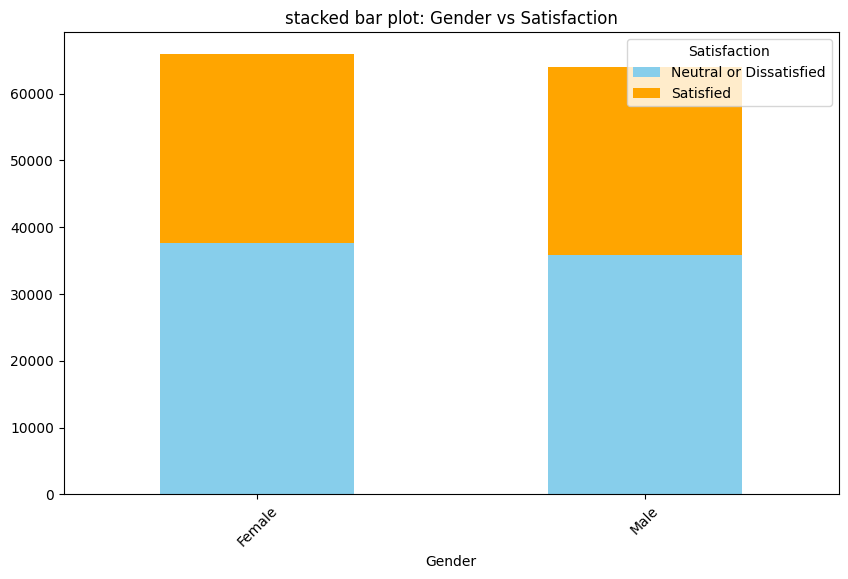


Analysis forCustomer Type vs Satisfaction

Contingency table for Customer Type vs Satisfaction
Satisfaction   Neutral or Dissatisfied  Satisfied
Customer Type                                    
First-time                       18080       5700
Returning                        55372      50728


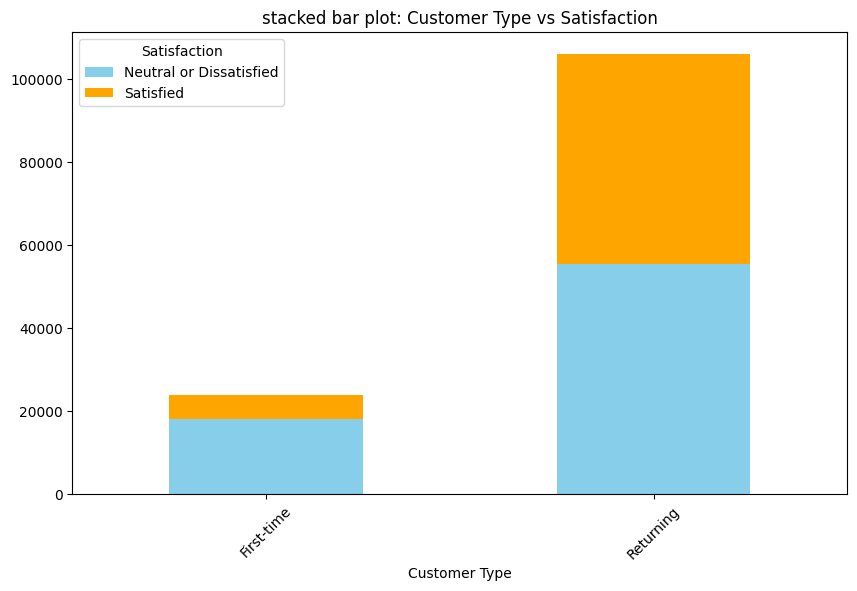


Analysis forType of Travel vs Satisfaction

Contingency table for Type of Travel vs Satisfaction
Satisfaction    Neutral or Dissatisfied  Satisfied
Type of Travel                                    
Business                          37337      52356
Personal                          36115       4072


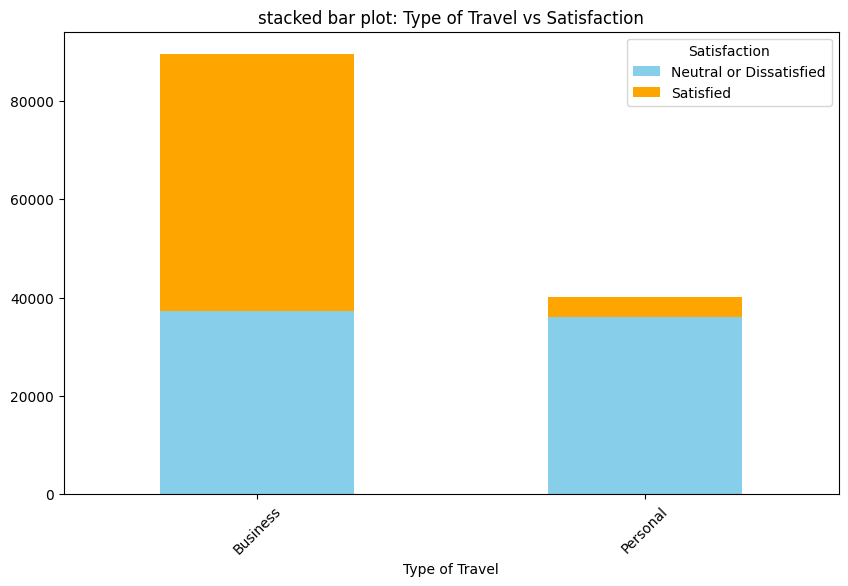


Analysis forClass vs Satisfaction

Contingency table for Class vs Satisfaction
Satisfaction  Neutral or Dissatisfied  Satisfied
Class                                           
Business                        18994      43166
Economy                         47366      10943
Economy Plus                     7092       2319


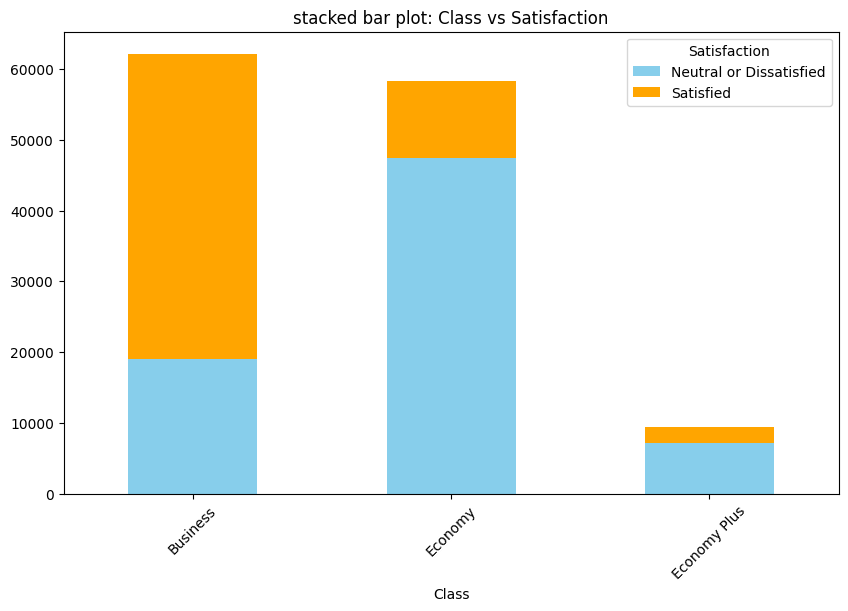

In [ ]:
def bivariate_analysis(categorical_features_new ,Satisfaction):
  for col in categorical_features_new :
    if col!=Satisfaction:
      print(f"\nAnalysis for{col} vs {Satisfaction}")


      contingency=pd.crosstab(categorical_features_new[col],categorical_features_new[Satisfaction])
      print(f"\nContingency table for {col} vs {Satisfaction}")
      print(contingency)

      contingency.plot(kind='bar',stacked=True, figsize=(10,6),color=['skyblue','orange'])
      plt.title(f"stacked bar plot: {col} vs {Satisfaction}")
      plt.xticks(rotation=45)
      plt.show()
bivariate_analysis(categorical_features_new ,'Satisfaction')
